# Tutorial for identifying repeating earthquakes and partial ruptures  from the NCEC catalog

In [1]:
#import packages 
from eqcat_pandas import * 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 22})

### Find repeating earthquakes 
Begin by identifying co-located events, which are considered to be within 1 rupture radius. 
Then filter to only repeating events, which are co-located events with the same magntiude

In [2]:
#init for finding repeating earthquakes 
eqvtest = Eqv(Update=True)
print('I am removing parkfield')
eqvtest.remove_parkfield()
print('I have removed parkfield')
eqvtest.filtertopoly(polyname= 'NearParkfield',mag = [1.1]) #magnitude cut off of 1.1 to identifiy mostly complete pairs of repeaters 
eqvtest.projtofault(sdr = [135,0])
eqvtest.moments(scl='Parkfield',sdrop = 10e6)

#Identifing co-located earthquakes 
ixtar=np.arange(0,eqvtest.neq())
ixref = np.arange(0,eqvtest.neq())

print('finding nearby events')
irefo,itaro = eqvtest.findnearbyevents(ixref=ixref,ixtar = ixtar,dsts=eqvtest.rad[ixref]/1000,verr=0.088,herr=0.097)

#Finding which of the repeating earthquakes are repeaters (co-located and within 0l3 magnitude units)
print('finding repeaters')
iref_repeat,itar_repeat = eqvtest.find_repeaters(irefo,itaro)


I am removing parkfield
filtering
I have removed parkfield
35.721 36.1059 -120.6791 -120.268
finding nearby events
staring finding nearby events
number of grids27
working on grid0
identify events in box
working on grid1
identify events in box
working on grid2
identify events in box
working on grid3
identify events in box
working on grid4
identify events in box
working on grid5
identify events in box
working on grid6
identify events in box
working on grid7
identify events in box
working on grid8
identify events in box
working on grid9
identify events in box
working on grid10
identify events in box
working on grid11
identify events in box
working on grid12
identify events in box
working on grid13
identify events in box
working on grid14
identify events in box
working on grid15
identify events in box
working on grid16
identify events in box
working on grid17
identify events in box
working on grid18
identify events in box
working on grid19
identify events in box
working on grid20
identify 

### Find partial ruptures of these repeating earthquakes 
Using the identified repeating events as the target events to search, then search the whole catalog for partial ruptures 

In [3]:
#find the unique ids of identified repeaters 
combinedITAR = np.unique([iref_repeat,itar_repeat])
COMBINED_REPEAT_ID = eqvtest.ids[combinedITAR]

#itit for partial ruptures 
eqvtest2 = Eqv(Update=True)
eqvtest2.remove_parkfield()
eqvtest2.filtertopoly(polyname= 'NearParkfield') #no limit to M1.1
eqvtest2.projtofault(sdr = [135,0])
eqvtest2.moments(scl='Parkfield',sdrop = 10e6)

a = (np.in1d(eqvtest2.ids,COMBINED_REPEAT_ID))
ixreffull=np.arange(0,eqvtest2.neq())
ixref = ixreffull[a] #target events are the unique repeating earthquakes 
ixtar = np.arange(0,eqvtest2.neq())

print('finding events nearby repeaters')
irefo,itaro = eqvtest2.findnearbyevents(ixref=ixref,ixtar = ixtar,dsts=eqvtest2.rad[ixref]/1000,verr=0.088,herr=0.097)

print('finding partial ruptures')
iref_partial,itar_partial = eqvtest2.find_partials(irefo,itaro)

filtering
35.721 36.1059 -120.6791 -120.268
finding events nearby repeaters
staring finding nearby events
number of grids27
working on grid0
identify events in box
working on grid1
identify events in box
working on grid2
identify events in box
working on grid3
identify events in box
working on grid4
identify events in box
working on grid5
identify events in box
working on grid6
identify events in box
working on grid7
identify events in box
working on grid8
identify events in box
working on grid9
identify events in box
working on grid10
identify events in box
working on grid11
identify events in box
working on grid12
identify events in box
working on grid13
identify events in box
working on grid14
identify events in box
working on grid15
identify events in box
working on grid16
identify events in box
working on grid17
identify events in box
working on grid18
identify events in box
working on grid19
identify events in box
working on grid20
identify events in box
working on grid21
identif

### Recreate Figure 2 

Finally, we create a figure similar to figure 2, showing the identified groups of co-located events made up of repeating earthquakes and partial ruptures (although figures in paper are plotted in GMT not in matplotlib)

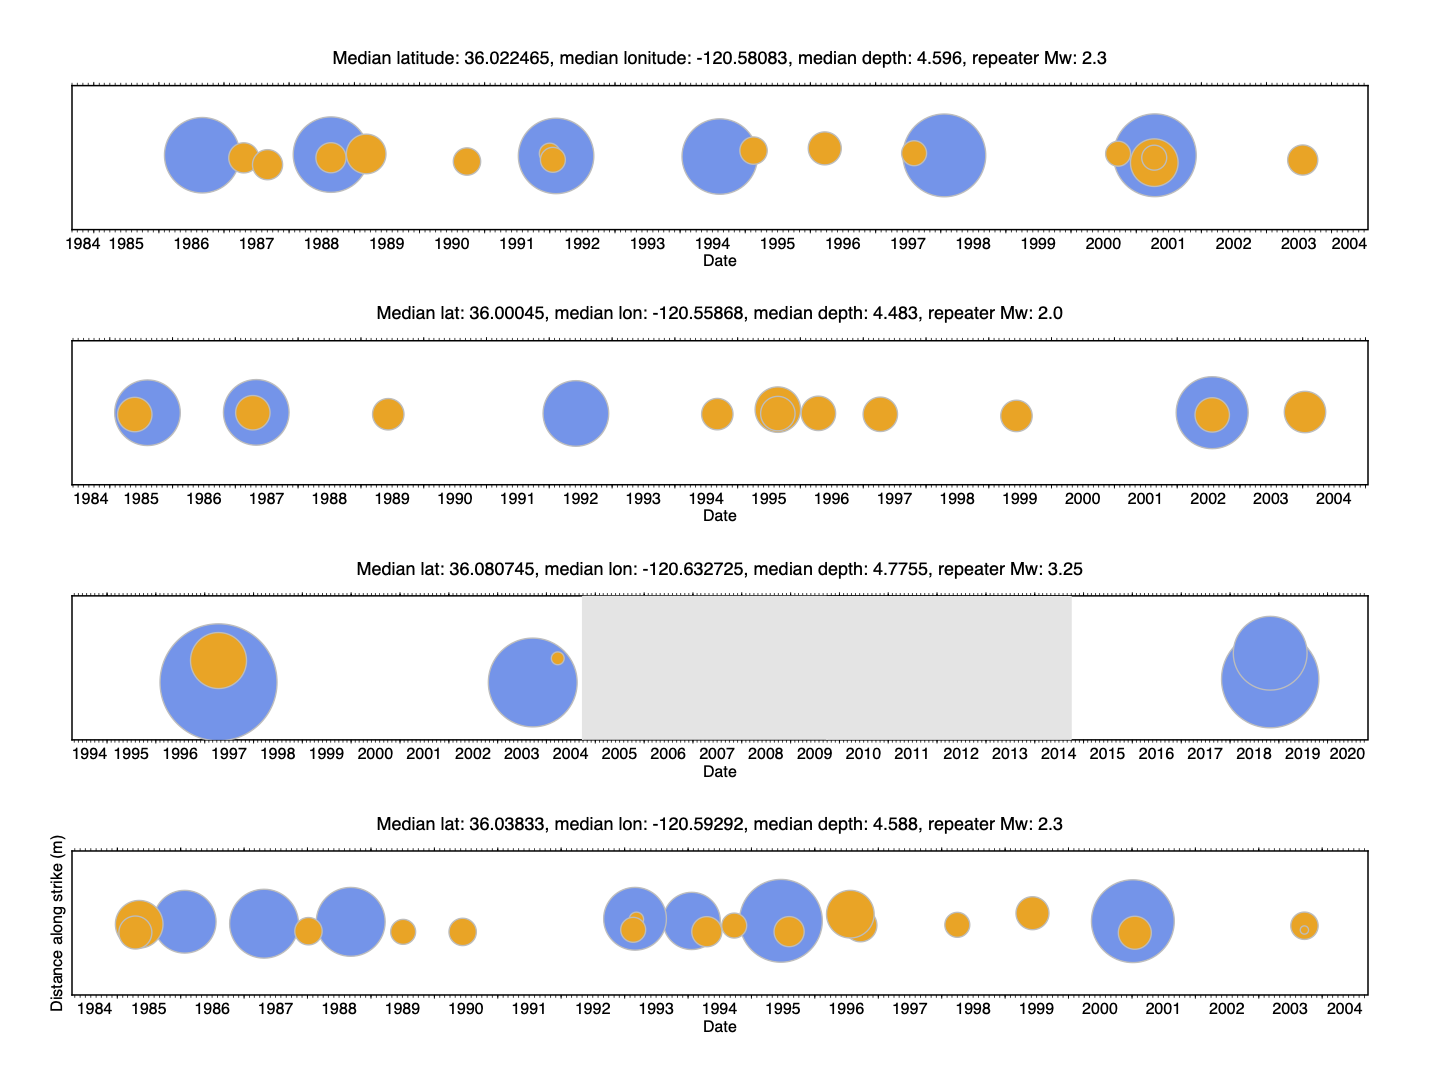

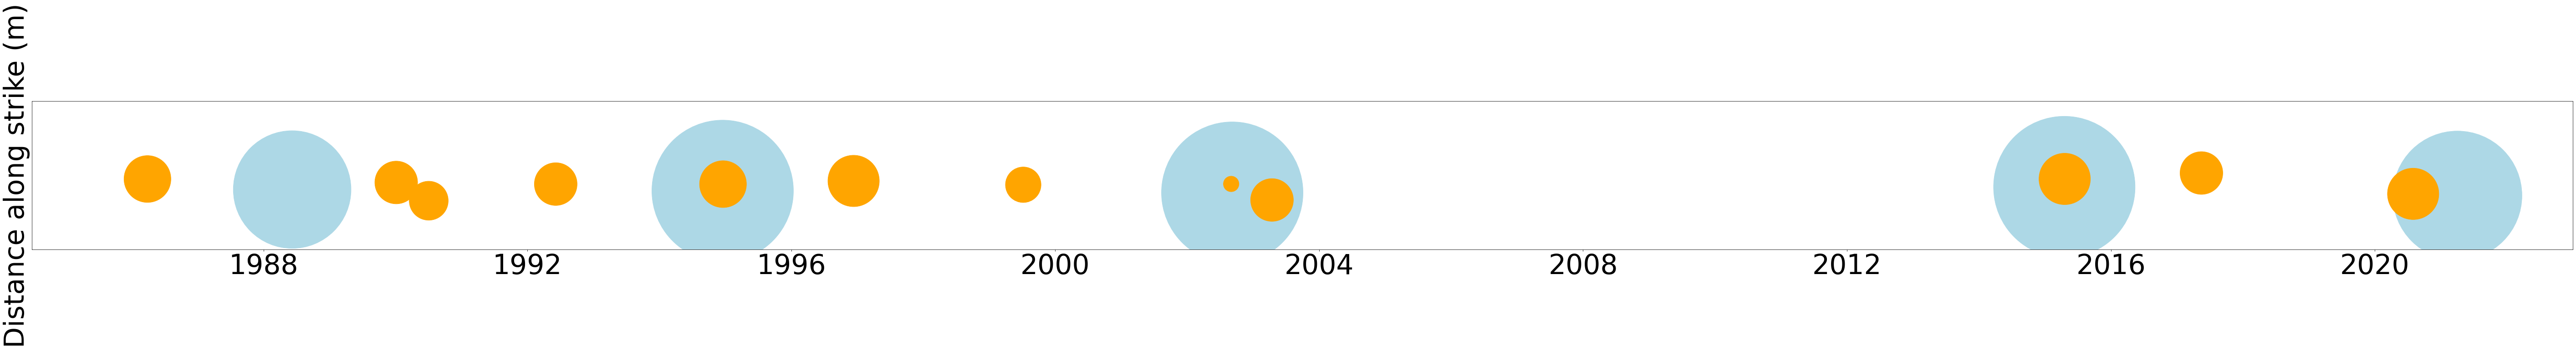

In [4]:
eqvtest2.Figure_2(irefo,itaro)